# Clustering animals with attributes

In this notebook, we'll get a feel for clustering by applying <font color="magenta">**k-means**</font> and <font color="magenta">**average linkage**</font> to cluster a collection of animals.

The data set we'll work with is called `Animals with Attributes`. It contains information about 50 animals. For each, it has 85 real-valued features that capture various properties of the animal: where it lives, what it eats, and so on. You can download the data set from:

http://attributes.kyb.tuebingen.mpg.de

(Under "Downloads", choose the "base package".) Make sure the files `'classes.txt'` and `'predicate-matrix-continuous.txt'` are in the same directory as this notebook before you begin.

## 1. Load in the data set

Standard includes as well as some modules for k-means and hierarchical clustering.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

Load in the data set. The file `'classes.txt'` contains the names of the 50 animals. The file `'predicate-matrix-continuous.txt'` contains the data itself: 85 attributes per animal.

In [2]:
#
# Load in animal names
#
f = open('Animals_with_Attributes/classes.txt')
lines = f.readlines()
names = []
for line in lines:
    (key,val) = line.split()
    names.append(val)
f.close()
#
# Load attribute matrix
#
x = np.loadtxt('Animals_with_Attributes/predicate-matrix-continuous.txt')

## 2. K-means clustering

We now run Lloyd's algorithm to obtain a flat clustering of the data. In the code below, we ask for k=15 clusters, but you should experiment with other choices.

We ask for random initialization, which means that different runs of the algorithm will potentially have different outcomes. It is worth running the algorithm several times to see how the results change.

In [6]:
#
# Run Lloyd's algorithm
#
k = 15 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
#
# Get a list of the animals in each cluster
#
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])
#
# Print out clusters
#
for j in range(0,k):
    print (j+1, clusters[j])

1 ['dalmatian', 'persian+cat', 'siamese+cat', 'skunk', 'chihuahua', 'rat', 'weasel', 'collie', 'raccoon']
2 ['moose']
3 ['blue+whale', 'humpback+whale']
4 ['hippopotamus', 'elephant', 'ox', 'sheep', 'rhinoceros', 'buffalo', 'pig', 'cow']
5 ['german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion']
6 ['mole', 'hamster', 'squirrel', 'rabbit', 'mouse']
7 ['zebra']
8 ['antelope', 'horse', 'giraffe', 'deer']
9 ['giant+panda']
10 ['bat']
11 ['spider+monkey', 'gorilla', 'chimpanzee']
12 ['seal', 'walrus']
13 ['beaver', 'otter']
14 ['killer+whale', 'dolphin']
15 ['grizzly+bear', 'polar+bear']


## 3. Hierarchical clustering

We use the built-in hierarchical clustering module of `scipy` to apply Ward's method to our data. The resulting tree is often called a *dendrogram*, and the module also has a routine that can display one of these.

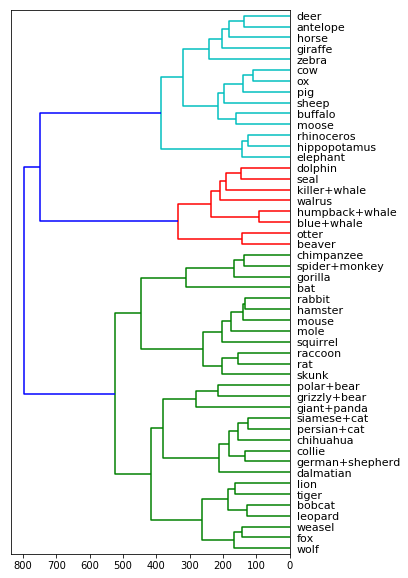

In [4]:
#
# Adjust figure size to accommodate the full tree
#
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10
#
# Do hierarchical clustering using Ward's method
#
z = sch.linkage(x, method='ward')
#
# Display dendrogram
#
info = sch.dendrogram(z, orientation='left', labels=names, leaf_font_size=11)

## 4. Questions to ponder

Here are some things to think about:

<font color="magenta">Multiple runs of Lloyd's algorithm.</font>
Lloyd's algorithm potentially returns a different solution each time it is run. Is there any reason to run it more than once? For instance, is there a sensible way of combining the information from several runs, of interpreting the similarities and differences?

<font color="magenta">Sensitivity to the choice of features.</font>
Both clustering methods are highly sensitive to the choice of features. How would you feel if the results changed dramatically when just one or two features were dropped? 

<font color="magenta">Criteria for success.</font>
This is clearly an application in which we are hoping that clustering will discover 'natural groups' in the data. To what extent do the algorithms succeed at this? Are the clusters mostly reasonable? Can we, in general, hope that tha clustering will perfectly capture what we want? Under what conditions would we be pleased with the clustering?

In [5]:
#For 1st run
d1=dict()
for j in range(0,k):
    d1[j+1]=clusters[j]

In [7]:
#For second run
d2=dict()
for j in range(0,k):
    d2[j+1]=clusters[j]

In [8]:
#Finiding similarities and differences
same = set()
different = dict()
for key in set(d1.keys()) & set(d2.keys()):
    if d1[key] == d2[key]:
        same.add(key)
    else:
        if key not in different:
            different[key] = []
        different[key].extend([d1[key], d2[key]])

In [9]:
same

set()

In [10]:
different

{1: [['skunk'],
  ['dalmatian',
   'persian+cat',
   'siamese+cat',
   'skunk',
   'chihuahua',
   'rat',
   'weasel',
   'collie',
   'raccoon']],
 2: [['persian+cat', 'siamese+cat'], ['moose']],
 3: [['killer+whale', 'blue+whale', 'humpback+whale', 'walrus'],
  ['blue+whale', 'humpback+whale']],
 4: [['german+shepherd', 'fox', 'wolf'],
  ['hippopotamus',
   'elephant',
   'ox',
   'sheep',
   'rhinoceros',
   'buffalo',
   'pig',
   'cow']],
 5: [['grizzly+bear', 'polar+bear'],
  ['german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion']],
 6: [['antelope', 'horse', 'giraffe', 'zebra', 'deer'],
  ['mole', 'hamster', 'squirrel', 'rabbit', 'mouse']],
 7: [['tiger', 'leopard', 'bobcat', 'lion'], ['zebra']],
 8: [['hamster', 'rabbit', 'mouse'], ['antelope', 'horse', 'giraffe', 'deer']],
 9: [['rat', 'weasel', 'raccoon'], ['giant+panda']],
 10: [['mole'], ['bat']],
 11: [['spider+monkey', 'gorilla', 'chimpanzee', 'squirrel'],
  ['spider+monkey', 'gorilla', 'chimpanzee']],
 1

#### Never do they have same clusters